In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv("netflix_titles.csv", index_col=False)

In [3]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (8807, 12)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [6]:
(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['director'] = df['director'].fillna('unknown')
df['cast'] = df['cast'].fillna('unknown')
df['country'] = df['country'].fillna('unknown')
df['rating'] = df['rating'].fillna(0)

In [10]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
df_countries = df['country'].dropna().str.split(',').explode().str.strip()
country_counts = df_countries.value_counts()
print(type(country_counts))
print(country_counts.head(10))

<class 'pandas.core.series.Series'>
country
United States     3690
India             1046
unknown            831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


In [12]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [13]:
(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
0              4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: int64

In [14]:
print(df['country'].value_counts().head(5))

country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64


In [15]:
print(df['release_year'].value_counts().head(10))

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anjal\AppData\Local\Temp\ipykernel_22116\4157449600.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


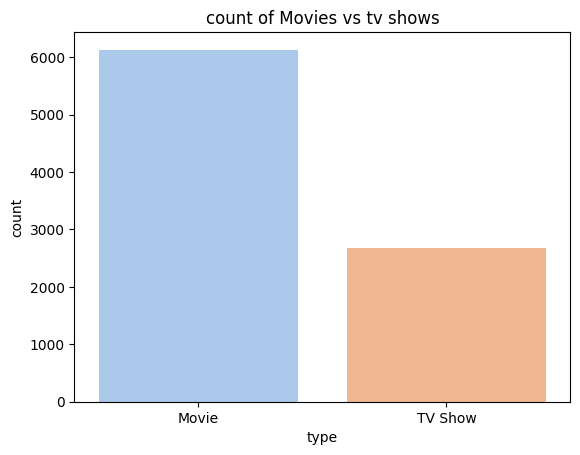

In [17]:
sns.countplot(x='type', data=df, palette='pastel')
plt.title('count of Movies vs tv shows')
plt.show()

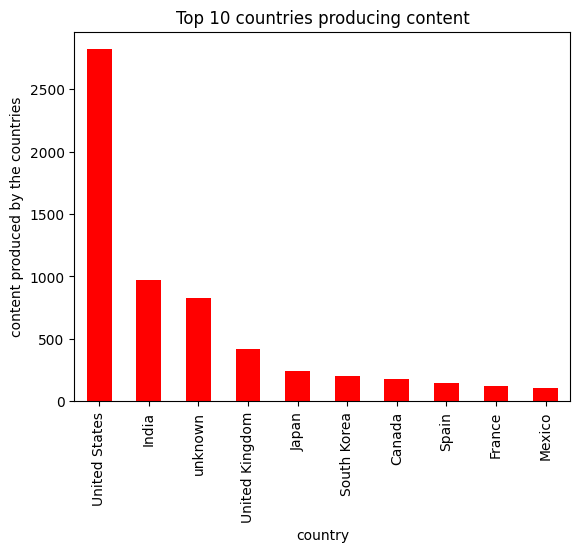

In [106]:
#plot
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='red')
plt.title('Top 10 countries producing content')
plt.ylabel('content produced by the countries')
plt.xlabel('country')
plt.show()

In [19]:
#value counts for for top 20 release year with most content 
release_year_count = df['release_year'].value_counts().head(20)
release_year_count

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt 

In [21]:
release_year_count_sorted = release_year_count.sort_index()

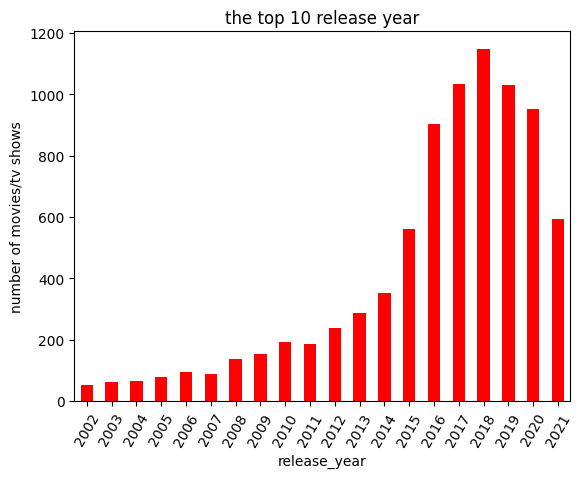

In [105]:
#plot
release_year_count_sorted.plot(kind='bar', color='red')
plt.title('the top 10 release year')
plt.xlabel('release_year')
plt.ylabel('number of movies/tv shows')
plt.xticks(rotation=60)
plt.show()

### Insights
- The year with the most content on Netflix is 2018
- There is a clear increase/decrease in content around 2020-2021
- Netflix consistently added content between the years shown, indicating trends in acquisition or production.


In [23]:
#top 10 genres 
listed_in_counts = df['listed_in'].value_counts().head(10)
listed_in_counts

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt 

In [25]:
listed_in_counts_sorted = listed_in_counts.sort_index()

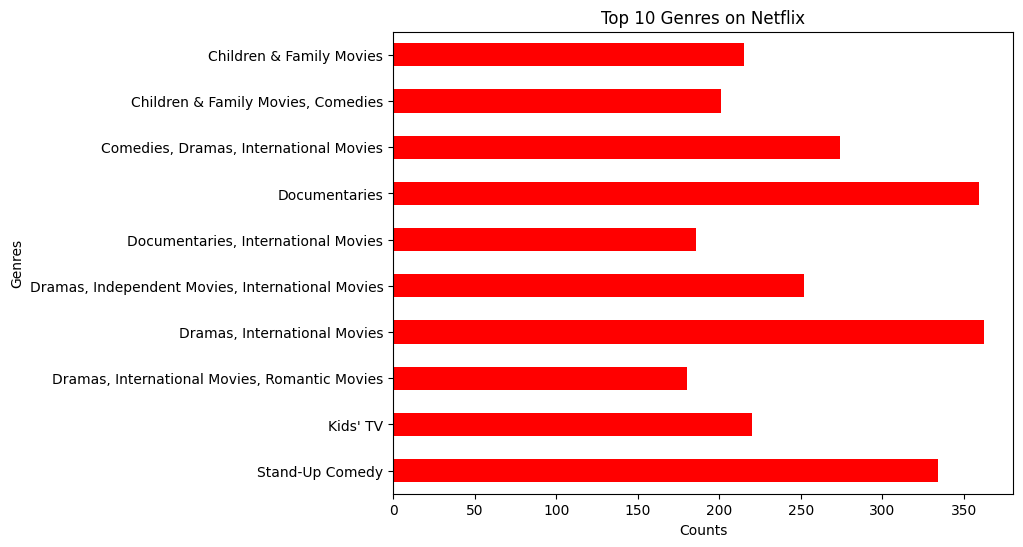

In [104]:
listed_in_counts_sorted.plot(kind='barh', color='red', figsize=(8,6))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Counts")
plt.ylabel("Genres")
plt.gca().invert_yaxis()
plt.show()


## insights 
- The genre with most content is dramas and international movies 
- The genre with least content is romantic movies 

In [27]:
#seperate the movies 
movies_df = df[df['type'] =='Movie'].copy()
shows_df = df[df['type'] =='Shows'].copy()

In [28]:
valid_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'TV-G', 'TV-PG','TV-14', 'TV-MA', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'NR', 'UR']

In [29]:
movies_df = movies_df[movies_df['rating'].isin(valid_ratings)]

In [49]:
movies_df['duration_clean'] = movies_df['duration'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anjal\AppData\Local\Temp\ipykernel_22116\1055921534.py:1: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_clean'] = movies_df['duration'].str.extract('(\d+)').astype(float)


In [50]:
rating_duration = movies_df.groupby('rating')['duration_clean'].mean().sort_values(ascending=False)
rating_duration

rating
NC-17       125.000000
TV-14       110.290820
PG-13       108.330612
R           106.720201
UR          106.333333
PG           98.282230
TV-MA        95.889913
TV-PG        94.851852
NR           94.533333
G            90.268293
TV-G         79.666667
TV-Y7-FV     68.400000
TV-Y7        66.287770
TV-Y         48.114504
Name: duration_clean, dtype: float64

In [51]:
import matplotlib.pyplot as plt

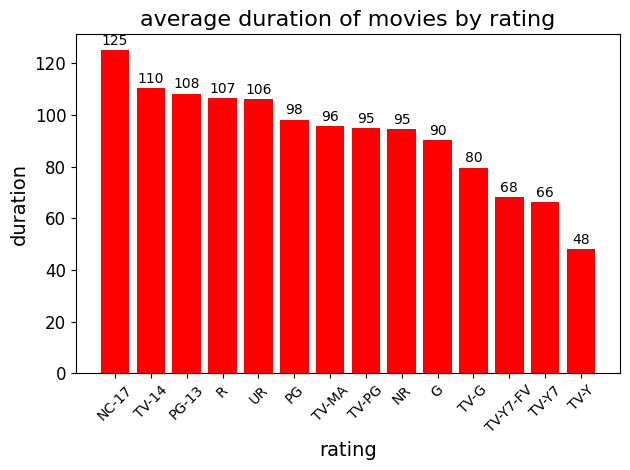

In [ ]:
#barplot
plt.Figure(figsize=(12,6))
#labels and titles 
plt.bar(rating_duration.index, rating_duration.values, color='red')
plt.title('average duration of movies by rating', fontsize= 16)
plt.xlabel('rating', fontsize= 14)
plt.ylabel('duration',fontsize= 14 )
plt.xticks(rotation= 45)
plt.yticks(fontsize= 12)

for idx, val in enumerate(rating_duration.values):
    plt.text(idx, val + 2, f"{val:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('plots/avg_movie_duration_matplotlib.png')
plt.show()
